### Sample Pre-selection
- Trigger: HLT_Ele27_eta2p1_WPTight_Gsf
- Overlap removal with dR<0.4, in the preference of muon over electron over photon over jets
- at least 1 photon object and only 1 electron object required
- no muons in sample
- cut-based working points
- photon: medium, pT>20
- electron: medium, pT>10
- muon: tight, pT> 25

### MC samples:
- ZGTo2LG_TuneCUETP8M1_13TeV-amcatnloFXFX-pythia8/
- DYJetsToLL_M-50_TuneCUETP8M1_13TeV-madgraphMLM-pythia8/ 

In [1]:
import ROOT
from IPython.display import display, Math, Latex
import rootnotes

Welcome to JupyROOT 6.10/05


In [2]:
cd /home/kakw/efake/WG_Analysis/Plotting

/home/kakw/efake/WG_Analysis/Plotting


## Import Samples

In [3]:
%run interactiveStackTree.py --baseDir /data/users/jkunkle/Resonances/LepLep_elel_2018_03_28/ \
--samplesConf Modules/Resonance.py --xsFile cross_sections/photon15.py \
--lumi 35900. --treeName UMDNTuple/EventTree --fileName tree.root --jupyt --quiet

-------------------------------------
 LOAD CROSS SECTION INFO
-------------------------------------
GJets_HT-600ToInf              xsec :     93.4 pb Nevent : 2463946  lumi : 2.64e+04 scale :     1.36
WZ3LNLO                        xsec :     5.26 pb Nevent : 8260201  lumi : 1.57e+06 scale :   0.0229
WJetsToLNu_HT-800To1200        xsec :     7.48 pb Nevent : 1544513  lumi : 2.06e+05 scale :    0.174
WJetsToLNu_HT-600To800         xsec :     16.3 pb Nevent : 3779141  lumi : 2.32e+05 scale :    0.155
GJets_HT-100To200              xsec : 9.23e+03 pb Nevent : 5131873  lumi :      556 scale :     64.5
ResonanceMass2000              xsec : 0.000172 pb Nevent : 50000    lumi :  2.9e+08 scale : 0.000124
TTJets_SingleLeptFromTbar      xsec :      179 pb Nevent : 46455353 lumi :  2.6e+05 scale :    0.138
GJets_HT-40To100               xsec : 2.07e+04 pb Nevent : 4467985  lumi :      216 scale :      167
ResonanceMass1000              xsec : 0.000748 pb Nevent : 50000    lumi : 6.69e+07 scale :

In [4]:
baseeta = base = 'ph_n>=0 && el_n==2'

In [5]:
hist_config = {'colors' : [ROOT.kBlue, ROOT.kMagenta], 'xlabel':'m(l,l)',
               'rlabel':'blue/magenta' ,         'doratio' : 1,  'normalize':1,'logy':1}
samples.CompareSelections('m_ll', [baseeta,baseeta],['Z+jets','Zgamma'], (50,0,200),
                          hist_config, {}, {'legend_entries':['Z+jets : 0 #gamma', ' Z#gamma : 1 #gamma']})

[<Sample m_ll at 7fa9d6fc9cb0>, <Sample m_ll_0 at 7fa9d6fdf7a0>]
{'name': '__AllStack__'}
{'name': [], 'isActive': True}
0.04


Error in <TGClient::TGClient>: can't open display "", switching to batch mode...
 In case you run from a remote ssh session, reconnect with ssh -Y


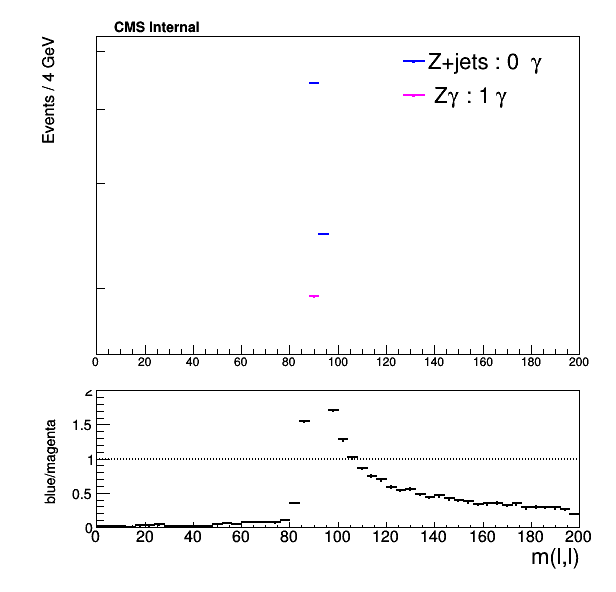

Info in <TCanvas::Print>: png file /tmp/tmpGow7WE.png has been created


In [6]:
#samples.curr_canvases['top'].cd()
##samples.samples[-2].hist.GetYaxis().UnZoom()
#ROOT.gPad.Modified();ROOT.gPad.Update()
samples.curr_canvases['base']

### ee 2-body mass in well-reconstructed Z+jet and Z gamma events

- The ISR peak is larger than FSR peak (sub-Z-mass contribution)
- compare to plot last week. The FSR peak was larger.
- FSR photon is colinear with one of the photons. This increases chance of mis-reconstruction (needs verify: two photon objects are collinear)

In [7]:
hist_config = {'colors' : [ROOT.kBlue, ROOT.kMagenta], 'xlabel':'count',
               'rlabel':'blue/magenta' ,         'doratio' : 1,'reverseratio':1,'ymax':1e9,'ymin':1e3,'rmax':1e-2,'logy':1}
samples.CompareSelections('0', [baseeta+"&& ph_n==0",baseeta+"&& ph_n==1"],['Z+jets']*2, (1,0,1),
                          hist_config, {}, {'legend_entries':['Zjets: 0 #gamma', ' Zjets : 1 #gamma']})

removing sample m_ll
removing sample m_ll_0
removing sample ratioZgamma
[<Sample 0 at 7fa9d6fdf7a0>, <Sample 0_0 at 7fa9d6e745a8>]
{'name': '__AllStack__'}
{'name': [], 'isActive': True}
0.04


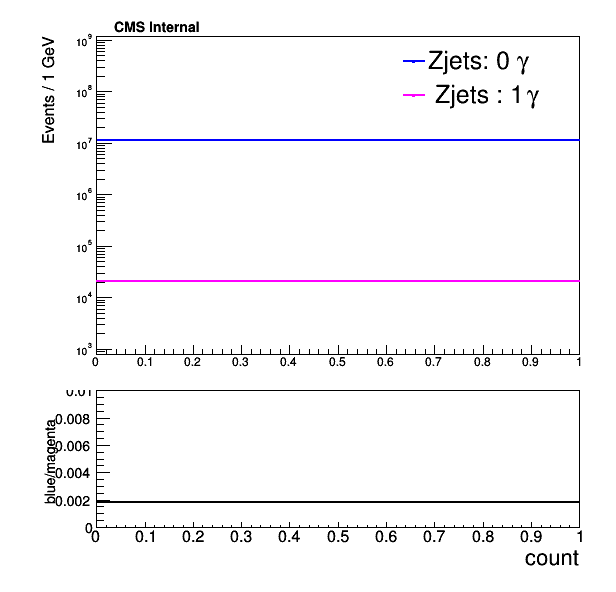

Info in <TCanvas::Print>: png file /tmp/tmpB1Fad9.png has been created


In [8]:
samples.curr_canvases['base']


## Checking long tail discrepency between data and MC in m(e,$\gamma$)

In [13]:
samples.Draw("m_ll","el_n==2 && abs(el_eta[0])<1.4 && abs(el_eta[1])<1.4",(120,0,600),{"xlabel":"m(e,e)","ymin":10,"logy":1, "blind":False});

m_ll : el_n==2 && abs(el_eta[0])<1.4 && abs(el_eta[1])<1.4
removing sample __AllStack__
Creating hist for Data
Data  is DATA!!
0.04


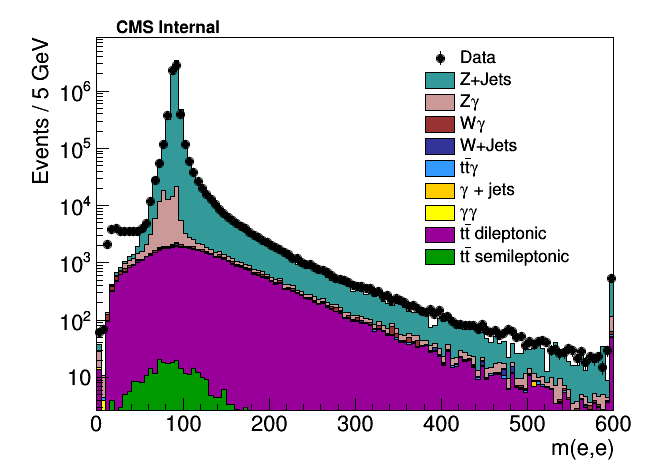

Info in <TCanvas::Print>: png file /tmp/tmpOpOQgM.png has been created


In [14]:
samples.curr_canvases['base']


**Note** : it looks like the tail here is fine. Nothing dramatic. Nevertheless we don't have significant contribution for Wg and gg here.

## MET in barrel dielectron sample 

In [21]:
samples.Draw("met_pt","el_n==2 && abs(el_eta[0])<1.4  && abs(el_eta[1])<1.4",(120,0,600),{"xlabel":"met","ymin":10,"logy":1, "blind":False});

met_pt : el_n==2 && abs(el_eta[0])<1.4  && abs(el_eta[1])<1.4
removing sample __AllStack__
Creating hist for Data
Data  is DATA!!
0.04


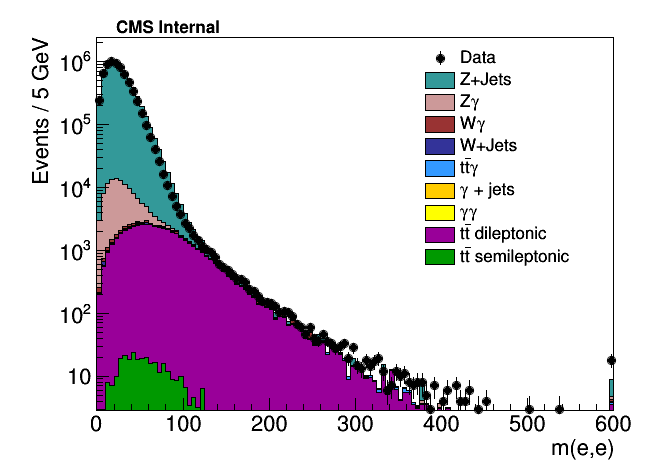

Info in <TCanvas::Print>: png file /tmp/tmpqkbGLD.png has been created


In [12]:
samples.curr_canvases['base']


## MET in barrel dielectron sample ($m_{ee}$ tail)

In [19]:
samples.Draw("met_pt","el_n==2 && abs(el_eta[0])<1.4  && abs(el_eta[1])<1.4 && m_ll>400",(120,0,600),{"xlabel":"met","ymin":10,"logy":1, "blind":False});

met_pt : el_n==2 && abs(el_eta[0])<1.4  && abs(el_eta[1])<1.4 && m_ll>400
removing sample __AllStack__
Creating hist for Data
Data  is DATA!!
0.04


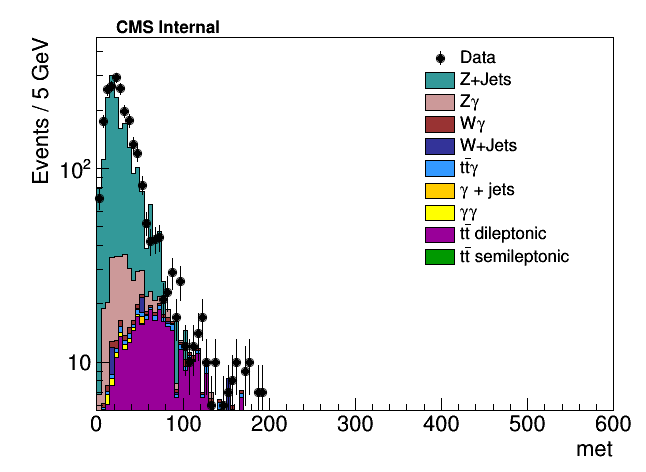

Info in <TCanvas::Print>: png file /tmp/tmpyJPmjP.png has been created


In [20]:
samples.curr_canvases['base']
